In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import folium


In [2]:
df=pd.read_excel('/content/Meteorite Landing.xlsx')
print(df.head())

       Name   ID NameType Classification                       Mass  Fall  \
0    Aachen    1    Valid             L5      Quantity[21, "Grams"]  Fell   
1    Aarhus    2    Valid             H6     Quantity[720, "Grams"]  Fell   
2      Abee    6    Valid            EH4  Quantity[107000, "Grams"]  Fell   
3  Acapulco   10    Valid    Acapulcoite    Quantity[1914, "Grams"]  Fell   
4   Achiras  370    Valid             L6     Quantity[780, "Grams"]  Fell   

                                           Year  \
0  DateObject[{1880}, "Year", "Gregorian", -5.]   
1  DateObject[{1951}, "Year", "Gregorian", -5.]   
2  DateObject[{1952}, "Year", "Gregorian", -5.]   
3  DateObject[{1976}, "Year", "Gregorian", -5.]   
4  DateObject[{1902}, "Year", "Gregorian", -5.]   

                         Coordinates  
0     GeoPosition[{50.775, 6.08333}]  
1  GeoPosition[{56.18333, 10.23333}]  
2     GeoPosition[{54.21667, -113.}]  
3     GeoPosition[{16.88333, -99.9}]  
4   GeoPosition[{-33.16667, -64.95}

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            45716 non-null  object
 1   ID              45716 non-null  int64 
 2   NameType        45716 non-null  object
 3   Classification  45716 non-null  object
 4   Mass            45716 non-null  object
 5   Fall            45716 non-null  object
 6   Year            45716 non-null  object
 7   Coordinates     45716 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB
None


Data cleaning

In [4]:
df.replace('Missing[\"NotAvailable\"]', np.nan, inplace=True)
df['Mass_g'] = (df['Mass'].str.replace('Quantity[', '', regex=False).str.replace(', "Grams"]', '', regex=False))
df['Mass_g'] = pd.to_numeric(df['Mass_g'], errors='coerce')


df['Mass_kg']=df['Mass_g']/1000
df.drop(['Mass'], axis=1, inplace=True)

In [5]:
df['coords'] = (df['Coordinates'].str.replace('GeoPosition[{', '', regex=False).str.replace('}]', '', regex=False))
df.loc[df['Coordinates'].isna(), 'coords'] = np.nan
split_coords = df['coords'].str.split(',', expand=True)


df['Latitude'] = split_coords[0]
df['Longitude'] = split_coords[1]
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

df.drop(['coords'], axis=1, inplace=True)

In [6]:
df['Year_cleaned'] = (df['Year'].str.replace('DateObject[{', '', regex=False).str.replace('}, "Year", "Gregorian", -5.]', '', regex=False))
df['Year_cleaned'] = pd.to_numeric(df['Year_cleaned'], errors='coerce')


TOP 10 HEAVIEST METEORITES

In [7]:
top_10 = df[['Name','Mass_g']].sort_values(by='Mass_g', ascending=False).head(10)
print(top_10)

                        Name      Mass_g
16392                   Hope  60000000.0
5373            Catalina 011  58200000.0
5365            Catalina 003  50000000.0
5370            Catalina 008  30000000.0
3455              Asuka 8602  28000000.0
12613      Glorieta Mountain  26000000.0
5468        Colorado Springs  24300000.0
26297        Mundrabilla 005  24000000.0
920                    Sinai  23000000.0
5016   Bates Nunataks A78005  22000000.0


Grouping fall vs found

In [8]:
fall_count=df.groupby('Fall').size()
print(fall_count)

Fall
Fell      1107
Found    44609
dtype: int64


Average mass of most common classification

In [9]:
avg_mass = df.groupby('Classification')['Mass_g'].mean()
print(avg_mass)

Classification
Acapulcoite               490.424407
Acapulcoite/Lodranite      31.793333
Acapulcoite/lodranite      44.933333
Achondrite-prim          1078.000000
Achondrite-ung            895.845614
                            ...     
Unknown                          NaN
Ureilite                  490.014900
Ureilite-an              1287.125000
Ureilite-pmict            262.685652
Winonaite                1129.013200
Name: Mass_g, Length: 466, dtype: float64


classifying decade

In [10]:
df['Decade']=(df['Year_cleaned']//10)*10

print(f'There are {df['Decade'].nunique()} decades of data')
print('Number of meteors per decade fallen in this data : ')
meteors_per_decade=df.groupby('Decade').size()
print(meteors_per_decade)




There are 46 decades of data
Number of meteors per decade fallen in this data : 
Decade
860.0         1
920.0         1
1390.0        1
1490.0        3
1510.0        1
1570.0        1
1580.0        1
1600.0        1
1620.0        3
1630.0        3
1640.0        1
1650.0        1
1660.0        2
1670.0        1
1680.0        1
1700.0        1
1710.0        2
1720.0        2
1740.0        3
1750.0        4
1760.0        4
1770.0        5
1780.0        5
1790.0       12
1800.0       22
1810.0       30
1820.0       30
1830.0       33
1840.0       49
1850.0       71
1860.0       95
1870.0       89
1880.0      123
1890.0      126
1900.0      139
1910.0      154
1920.0      159
1930.0      309
1940.0      196
1950.0      212
1960.0      397
1970.0     4969
1980.0     6822
1990.0    11619
2000.0    17757
2010.0     1963
dtype: int64


In [11]:
print('Average mass of meteor per decade in kg: ')
avg_mass_per_decade=df.groupby('Decade')['Mass_kg'].mean()
print(avg_mass_per_decade)

Average mass of meteor per decade in kg: 
Decade
860.0         0.472000
920.0              NaN
1390.0      107.000000
1490.0       63.551650
1510.0             NaN
1570.0    50000.000000
1580.0       15.000000
1600.0    10100.000000
1620.0       13.789000
1630.0        9.020000
1640.0             NaN
1650.0             NaN
1660.0        0.040000
1670.0        4.500000
1680.0        0.695000
1700.0             NaN
1710.0        4.350000
1720.0       49.019500
1740.0      246.353333
1750.0       23.513333
1760.0        8.166667
1770.0     1002.300000
1780.0     1104.681000
1790.0      153.652318
1800.0      191.493136
1810.0     2008.491023
1820.0       76.405321
1830.0      892.721303
1840.0       25.804734
1850.0      504.516168
1860.0      349.599421
1870.0      123.179764
1880.0      109.125048
1890.0      498.747294
1900.0      173.734150
1910.0      199.501329
1920.0      460.037579
1930.0       88.293101
1940.0      155.834681
1950.0       88.580171
1960.0       39.231117
1970.0  

Numpy operations

In [12]:


mean_mass= np.nanmean(df['Mass_kg'])
print(f'Mean mass of meteors is {mean_mass} kg')


mean_mass_falling= np.nanmean(df[df['Fall']=='Fell']['Mass_kg'])
print(f'Mean mass of metoers falling on earth is {mean_mass_falling} kg')
print('')
median_mass = np.nanmedian(df['Mass_kg'])
print(f'Median mass of all meteors is {median_mass} kg')


median_mass_falling = np.nanmedian(df[df['Fall']=='Fell']['Mass_kg'])
print(f'Median mass of meteors falling on earth is {median_mass_falling} kg')

print('')

heaviest = np.nanmax(df['Mass_kg'])
print(f'The heaviest meteor is {heaviest} kg')

print('')

std=np.std(df['Mass_kg'])
print(f'Standard deviation of mass of all meteors is {std} kg')


print('')


sum_meteor = np.sum(df['Mass_kg'])
print(f'Sum of all mass of all meteors is {sum_meteor} kg')

Mean mass of meteors is 13.278078548601515 kg
Mean mass of metoers falling on earth is 47.070715023255815 kg

Median mass of all meteors is 0.032600000000000004 kg
Median mass of meteors falling on earth is 2.8 kg

The heaviest meteor is 60000.0 kg

Standard deviation of mass of all meteors is 574.9825695986993 kg

Sum of all mass of all meteors is 605281.210638 kg


The average looks much higher, about 13 kilograms, but that’s misleading,Most of the meteorites you found are tiny — around 32 grams each,The standard deviation confirms that the weights differ by a huge number

visual representation

meteors found per decade

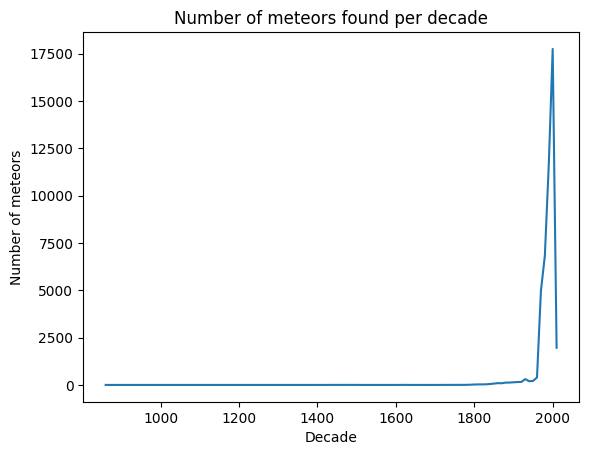

In [13]:
plt.plot(meteors_per_decade.index, meteors_per_decade.values)
plt.xlabel('Decade')
plt.ylabel('Number of meteors')
plt.title('Number of meteors found per decade')
plt.show()

meteors fallen vs found

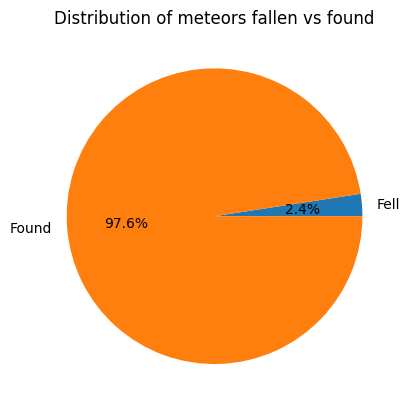

In [14]:
plt.pie(fall_count, labels=fall_count.index, autopct='%1.1f%%')
plt.title('Distribution of meteors fallen vs found')
plt.show()

Mass distribution of asteroids

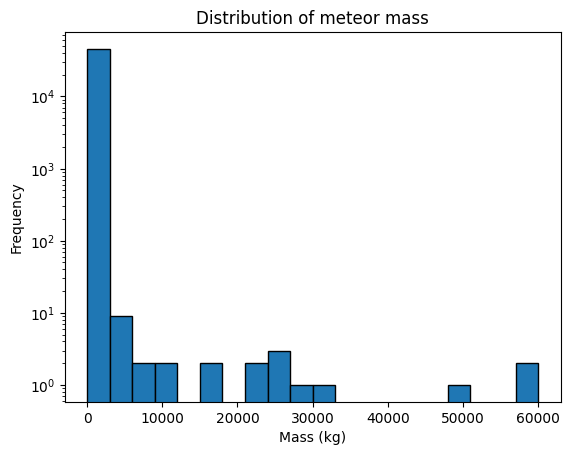

In [15]:
mass_data=df['Mass_kg'].dropna()
plt.hist(mass_data, bins=20, edgecolor='black')
plt.yscale('log')
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of meteor mass')
plt.show()


top 10 classification

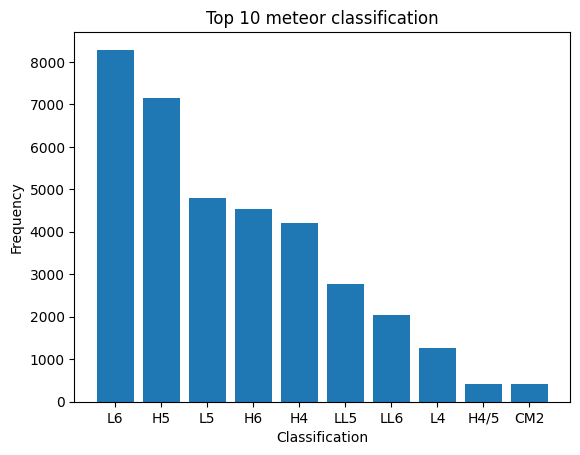

In [16]:
top_10_counts = df['Classification'].value_counts().nlargest(10)
plt.bar(top_10_counts.index, top_10_counts.values)
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.title('Top 10 meteor classification')
plt.show()

Final Summary


*   The number of finds exploded starting in the 2000s.
*  Typical meteor is lightweight but the heavy ones drag the average to the higher side
*   Meteors falling are heavier than ones found
*   The L6 classification is the most common meteorite type by far in the dataset





